In [136]:
# Import dependencies
import requests
import json
import pandas as pd
from dotenv import load_dotenv, find_dotenv
import os
import time

# Load API Key
load_dotenv(find_dotenv('api.env')) # api.env not included in github. Please make separate env file.
api_key = os.getenv("POLYGON_KEY")

df = pd.DataFrame() # Create Empty Dataframe

base_url = "https://api.polygon.io"
stocksTicker = f"SPY" # SPY = S&P 500 <-- Change this for different stock

for od in range(240318, 240323):
    for strk in range (480, 521):
        odate = str(od)
        strike = str(strk)
        optionsTicker = f"O:{stocksTicker}{odate}C00{strike}000"
        multiplier = 5
        timespan = 'minute' # multiplier + timespan = 5 minutes
        test = f"20{odate[:2]}-{odate[2:4]}-{odate[4:]}"

        query_url = f"{base_url}/v2/aggs/ticker/{optionsTicker}/range/{multiplier}/{timespan}/{test}/{test}?adjusted=true&sort=asc&limit=50000&apiKey={api_key}"
        # Get the response
        response = requests.get(query_url)

        # Retrieve reviews
        reviews = response.json()

        if reviews['resultsCount'] > 0:
            # Convert JSON to Pandas Dataframe
            reviews_df = pd.json_normalize(reviews["results"])
            reviews_df = reviews_df.rename(columns={'v':'Volume', 'vw':'Volume Weighted', 'o':'Open Price', 'c':'Close Price', 'h':'Highest Price', 'l':'Lowest Price', 't':'Timestamp', 'n':'Number of Transaction'})
            reviews_df['Timestamp'] = pd.to_datetime(reviews_df['Timestamp'], unit='ms')
            reviews_df['Stock Name'] = stocksTicker
            reviews_df['Strike'] = strike

            df = pd.concat([df, reviews_df], ignore_index= True, axis = 0)

{'ticker': 'O:SPY240318C00480000', 'queryCount': 0, 'resultsCount': 0, 'adjusted': True, 'status': 'OK', 'request_id': '37dad4aea6497beaa29912e8815f8af3'}
{'ticker': 'O:SPY240318C00481000', 'queryCount': 1, 'resultsCount': 1, 'adjusted': True, 'results': [{'v': 1, 'vw': 32.51, 'o': 32.51, 'c': 32.51, 'h': 32.51, 'l': 32.51, 't': 1710784500000, 'n': 1}], 'status': 'OK', 'request_id': '734afcd9911a5e4c8cda2dd26faba9b5', 'count': 1}
{'ticker': 'O:SPY240318C00482000', 'queryCount': 0, 'resultsCount': 0, 'adjusted': True, 'status': 'OK', 'request_id': '2cadec1ed411f4b418882a27ebf7eb1a'}
{'ticker': 'O:SPY240318C00483000', 'queryCount': 1, 'resultsCount': 1, 'adjusted': True, 'results': [{'v': 9, 'vw': 29.86, 'o': 29.86, 'c': 29.86, 'h': 29.86, 'l': 29.86, 't': 1710791700000, 'n': 2}], 'status': 'OK', 'request_id': '4a87074defa23e0161c1094b7ca0661b', 'count': 1}
{'ticker': 'O:SPY240318C00484000', 'queryCount': 0, 'resultsCount': 0, 'adjusted': True, 'status': 'OK', 'request_id': '3687e4ac8bfd

In [137]:
df

,Volume,Volume Weighted,Open Price,Close Price,Highest Price,Lowest Price,Timestamp,Number of Transaction,Stock Name,Strike,...,Volume,Volume Weighted,Open Price,Close Price,Highest Price,Lowest Price,Timestamp,Number of Transaction,Stock Name,Strike
0,1.0,32.51,32.51,32.51,32.51,32.51,2024-03-18 17:55:00,1.0,SPY,481,...,513,2.3540,2.38,2.25,2.63,2.11,2024-03-22 13:30:00,98,SPY,520
1,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,612,2.3930,2.25,2.46,2.61,2.25,2024-03-22 13:35:00,55,SPY,520
2,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,676,2.2908,2.51,2.10,2.68,2.10,2024-03-22 13:40:00,93,SPY,520
3,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,504,2.0017,2.12,1.93,2.12,1.88,2024-03-22 13:45:00,75,SPY,520
4,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,775,2.1771,1.98,2.25,2.29,1.92,2024-03-22 13:50:00,90,SPY,520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,339,1.7970,1.60,1.81,1.89,1.57,2024-03-22 19:35:00,29,SPY,520
74,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,177,1.8690,1.84,1.97,2.02,1.75,2024-03-22 19:40:00,37,SPY,520
75,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,217,1.9543,1.95,2.02,2.06,1.84,2024-03-22 19:45:00,42,SPY,520
76,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,424,2.2132,2.05,2.21,2.34,1.97,2024-03-22 19:50:00,55,SPY,520


<Axes: xlabel='Timestamp'>

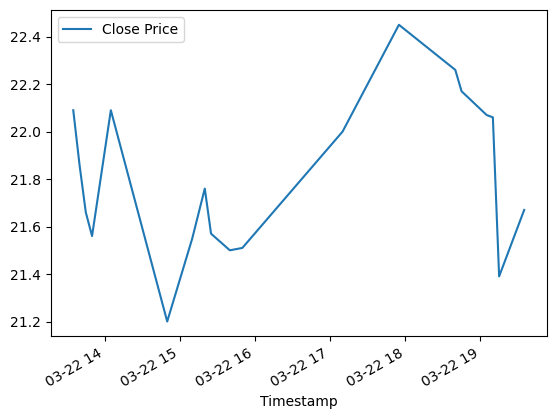

In [113]:
reviews_df.plot(kind='line',x='Timestamp', y='Close Price')
# Straight lines = weekends

In [122]:
#Save data to CSV
reviews_df.to_csv('../Data/ospy-agg-03-22-03-22.csv', date_format='%Y-%m-%d %H:%M:%S', index=False)
# -------------------------^^^ Change this to stock you chose

In [123]:
# Test CSV Import

df = pd.read_csv('../Data/ospy-agg-03-22-03-22.csv', parse_dates=['Timestamp'])
# ------------------------^^^ Change this to stock you chose
df

,Volume,Volume Weighted,Open Price,Close Price,Highest Price,Lowest Price,Timestamp,Number of Transaction,Stock Name,Strike
0,2,22.0900,22.09,22.09,22.09,22.09,2024-03-22 13:35:00,2,SPY,500
1,6,21.8800,21.98,21.86,21.98,21.86,2024-03-22 13:40:00,2,SPY,500
2,2,21.6600,21.66,21.66,21.66,21.66,2024-03-22 13:45:00,1,SPY,500
3,5,21.5660,21.59,21.56,21.59,21.56,2024-03-22 13:50:00,3,SPY,500
4,2,22.1550,22.22,22.09,22.22,22.09,2024-03-22 14:05:00,2,SPY,500
5,7,21.2000,21.20,21.20,21.20,21.20,2024-03-22 14:50:00,1,SPY,500
6,1,21.5500,21.55,21.55,21.55,21.55,2024-03-22 15:10:00,1,SPY,500
7,11,21.7600,21.76,21.76,21.76,21.76,2024-03-22 15:20:00,1,SPY,500
8,11,21.5700,21.57,21.57,21.57,21.57,2024-03-22 15:25:00,4,SPY,500
9,2,21.5000,21.50,21.50,21.50,21.50,2024-03-22 15:40:00,1,SPY,500


In [116]:
# Analysis - Checking Max values
print(f"Max values for Volume: {df['Volume'].max()}")
print(f"Max values for Volume Weighted: {df['Volume Weighted'].max()}")
print(f"Max values for Open Price: {df['Open Price'].max()}")
print(f"Max values for Close Price: {df['Close Price'].max()}")
print(f"Max values for Highest Price: {df['Highest Price'].max()}")
print(f"Max values for Lowest Price: {df['Lowest Price'].max()}")
print(f"Max values for Number of Transaction: {df['Number of Transaction'].max()}")

# Looking at the result, standardizing of data will be needed!

Max values for Volume: 20
Max values for Volume Weighted: 22.45
Max values for Open Price: 22.45
Max values for Close Price: 22.45
Max values for Highest Price: 22.45
Max values for Lowest Price: 22.45
Max values for Number of Transaction: 8
